done

In [1]:
ARCHITECTURE = 'cnn'
#EXPERIMENT_NAME = 'cnn-global-magnitude-unstruct'
ITERATIONS = 10

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers
from tqdm import tqdm
import matplotlib.pyplot as plt
from tqdm import tqdm
import foolbox as fb
import random
import json
from cleverhans.future.tf2.attacks import projected_gradient_descent, fast_gradient_method, carlini_wagner_l2


#tf.compat.v1.enable_eager_execution()
tf.keras.backend.clear_session()  # For easy reset of notebook state.

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate 1GB * 2 of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 3)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)


1 Physical GPUs, 1 Logical GPUs


In [ ]:
run_experiment(
    structure='unstructured', 
    method='random', 
    scope='local', 
    iterations=ITERATIONS
)

  0%|          | 0/10 [00:00<?, ?it/s]

938/938 [==============================] - 3s 3ms/step - loss: 1.5949 - accuracy: 0.8878 - val_loss: 1.5180 - val_accuracy: 0.9495



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5059 - accuracy: 0.9587 - val_loss: 1.4945 - val_accuracy: 0.9693
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4931 - accuracy: 0.9701 - val_loss: 1.4897 - val_accuracy: 0.9730
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4870 - accuracy: 0.9754 - val_loss: 1.4849 - val_accuracy: 0.9774
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4826 - accuracy: 0.9796 - val_loss: 1.4800 - val_accuracy: 0.9821
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4800 - accuracy: 0.9822 - val_loss: 1.4815 - val_accuracy: 0.9805
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4782 - accuracy: 0.9834 - val_loss: 1.4789 - val_accuracy: 0.9832
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:57, 297.66s/it]

current pruning ratio is0.5, current iteration is 0
(0.5008296730112249, 30786, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4825 - accuracy: 0.9849 - val_loss: 1.4782 - val_accuracy: 0.9861
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4731 - accuracy: 0.9905 - val_loss: 1.4744 - val_accuracy: 0.9890
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4710 - accuracy: 0.9919 - val_loss: 1.4737 - val_accuracy: 0.9884
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4700 - accuracy: 0.9926 - val_loss: 1.4735 - val_accuracy: 0.9887
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4687 - accuracy: 0.9937 - val_loss: 1.4760 - val_accuracy: 0.9863
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4682 - accuracy: 0.9940 - val_loss: 1.4736 - val_accuracy: 0.9881
Epoch 7/500
938/938 [==============================] - 


2it [08:55, 279.83s/it]

current pruning ratio is0.75, current iteration is 0
(0.25124450951683747, 15444, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5099 - accuracy: 0.9690 - val_loss: 1.4864 - val_accuracy: 0.9814
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4823 - accuracy: 0.9847 - val_loss: 1.4811 - val_accuracy: 0.9834
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4776 - accuracy: 0.9876 - val_loss: 1.4782 - val_accuracy: 0.9850
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4745 - accuracy: 0.9896 - val_loss: 1.4773 - val_accuracy: 0.9865
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4729 - accuracy: 0.9906 - val_loss: 1.4762 - val_accuracy: 0.9876
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4718 - accuracy: 0.9915 - val_loss: 1.4762 - val_accuracy: 0.9870
Epoch 7/500
938/938 [==============================] 


3it [13:28, 277.60s/it]

current pruning ratio is0.875, current iteration is 0
(0.12645192776964373, 7773, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5733 - accuracy: 0.9190 - val_loss: 1.5128 - val_accuracy: 0.9620
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5052 - accuracy: 0.9671 - val_loss: 1.4954 - val_accuracy: 0.9737
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4933 - accuracy: 0.9754 - val_loss: 1.4895 - val_accuracy: 0.9772
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4876 - accuracy: 0.9795 - val_loss: 1.4872 - val_accuracy: 0.9786
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4839 - accuracy: 0.9816 - val_loss: 1.4837 - val_accuracy: 0.9804
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4812 - accuracy: 0.9841 - val_loss: 1.4818 - val_accuracy: 0.9816
Epoch 7/500
938/938 [==============================] 

In [ ]:
run_experiment(
    structure='unstructured', 
    method='magnitude', 
    scope='local', 
    iterations=ITERATIONS
)

In [ ]:
run_experiment(
    structure='unstructured', 
    method='magnitude', 
    scope='global', 
    iterations=ITERATIONS
)

In [ ]:
run_experiment(
    structure='structured', 
    method='random', 
    scope='local', 
    iterations=ITERATIONS
)

In [ ]:
run_experiment(
    structure='structured', 
    method='magnitude', 
    scope='local', 
    iterations=ITERATIONS
)

In [ ]:
run_experiment(
    structure='structured', 
    method='magnitude', 
    scope='global', 
    iterations=ITERATIONS
)

# Prune, Train Attack Pipeline

In [9]:
def run_experiment(structure='unstructured', method='random', scope='global', iterations=10):
    
    experiment_name = f'{ARCHITECTURE}-{method}-{scope}-{structure}'
    pgd_success_rates = []
    cw_success_rates = []
    bb0_success_rates = []
    all_accuracies = []

    
    compression_rates = [tf.math.pow(2, x).numpy() for x in range(7)]
    pruning_ratios = [1-1/x for x in compression_rates]

    for j in tqdm(range(iterations)):
        accuracies = []
        pgd_success_rate = []
        cw_success_rate = []
        bb0_success_rate = []
        try: 
            del model
        except:
            ;
        tf.compat.v1.reset_default_graph()
        tf.keras.backend.clear_session()
        
        model = initialize_base_model(j, experiment_name=experiment_name, save_weights=True)
        for index, pruning_ratio in tqdm(enumerate(pruning_ratios)):

            #model.load_weights(f'./saved-weights/{experiment_name}-{j}')
            #print(f'./saved-weights/{experiment_name}-{j}')

            #for i in range(index + 1):
                print(f'current pruning ratio is{pruning_ratio}, current iteration is {j}')
                #if i != index:

                if  method=='random' and scope=='global' and structure=='unstructured':
                    model.prune_random_global_unstruct(pruning_ratio)
                elif  method=='random' and scope=='global' and structure=='structured':
                    model.prune_random_global_struct(pruning_ratio)
                elif  method=='random' and scope=='local' and structure=='unstructured':
                    model.prune_random_local_unstruct(pruning_ratio)
                elif  method=='random' and scope=='local' and structure=='structured':
                    model.prune_random_local_struct(pruning_ratio)
                elif  method=='magnitude' and scope=='global' and structure=='unstructured':
                    model.prune_magnitude_global_unstruct(pruning_ratio)
                elif  method=='magnitude' and scope=='global' and structure=='structured':
                    model.prune_magnitude_global_struct(pruning_ratio)
                elif  method=='magnitude' and scope=='local' and structure=='unstructured':
                    model.prune_magnitude_local_unstruct(pruning_ratio)
                elif  method=='magnitude' and scope=='local' and structure=='structured':
                    model.prune_magnitude_local_struct(pruning_ratio)
                else:
                    raise ValueError("pruning method invalid")

                print(get_zeros_ratio(model.get_weights()))
                model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
                              metrics=['accuracy'],
                              experimental_run_tf_function=False
                             )
                model = train_model(model, to_convergence=True)
                print(get_zeros_ratio(model.get_weights()))
                accuracies.append(model.evaluate(x_test, y_test, verbose=0))
                pgd_success_rate.append(pgd_attack(model))
                
                bb0_success_rate.append(bb0_attack(model))
                cw_success_rate.append(cw2_attack(model))
        all_accuracies.append(accuracies)
        pgd_success_rates.append(pgd_success_rate)
        cw_success_rates.append(cw_success_rate)
        bb0_success_rates.append(bb0_success_rate)
    #write to csv and json
    with open(f'saved-results/{experiment_name}-accuracies.json', 'w') as f:
        json.dump(all_accuracies, f)

    with open(f'saved-results/{experiment_name}-pgd-success.json', 'w') as f:
        json.dump(pgd_success_rates, f)
        
    with open(f'saved-results/{experiment_name}-cw2-success.json', 'w') as f:
        json.dump(cw_success_rates, f)
        
    with open(f'saved-results/{experiment_name}-bb0-success.json', 'w') as f:
        json.dump(bb0_success_rates, f)


# Helper Functions

In [5]:
def get_zeros_ratio(weights):
    layers_to_examine = [0,3,6,9,12]
    all_weights = np.array([])
    for x in layers_to_examine:

        all_weights = np.append(all_weights, weights[x].flatten())
    return np.count_nonzero(all_weights)/len(all_weights), np.count_nonzero(all_weights), len(all_weights)

def initialize_base_model(index, experiment_name, save_weights=False):

    model = CustomConvModel()

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
                  metrics=['accuracy'],
                  experimental_run_tf_function=False
                 )

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    model.fit(x=x_train,
              y=y_train,
              batch_size=64,
              epochs=1,
              callbacks=[callback],
              validation_data=(x_test, y_test),
             )
    if save_weights == True:
        model.save_weights(f'./saved-weights/{experiment_name}-{index}')
    return model



def train_model(model, to_convergence=True, epochs = 5):
    if to_convergence == True:
        callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
        model.fit(
            x=x_train,
            y=y_train,
            batch_size=64,
            epochs=500,
            callbacks=[callback],
            validation_data=(x_test, y_test),
            )
    if to_convergence == False:
        callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
        model.fit(
            x=x_train,
            y=y_train,
            batch_size=64,
            epochs=epochs,
            callbacks=[callback],
            validation_data=(x_test, y_test),
            )
    return model

def pgd_attack(model_to_attack):
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    attack = fb.attacks.LinfProjectedGradientDescentAttack()
    adversarials = attack(
        fmodel,
        x_to_attack,
        y_to_attack,
        epsilons=[8/255]
    )
    return np.count_nonzero(adversarials[2])/len(y_to_attack)

def cw2_attack(model_to_attack, eps=[.5]):
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    attack = fb.attacks.L2CarliniWagnerAttack()
    adversarials, _, success = attack(
        fmodel,
        x_to_attack,
        y_to_attack,
        epsilons=eps
    )
    return np.count_nonzero(success)/len(y_to_attack)

def bb0_attack(model_to_attack):
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    cls_samples = {}
    idx = 0
    starting_points = []
    
    while len(list(cls_samples)) < 10 and idx < len(x_test):
        clean_pred = int(np.argmax(model_to_attack(x_test[idx])))
        cls_samples[clean_pred] = x_test[idx]
        idx += 1
        #print(idx)
        #print(len(list(cls_samples)))
    
    for x in list(x_to_attack):
        counter = 0
        try:
            least_likely = int(np.argmin(model_to_attack(x)))
            if least_likely in cls_samples and np.argmax(model_to_attack(cls_samples[least_likely])) != np.argmax(model_to_attack(x)):
                starting_points.append(cls_samples[least_likely])
            else:
                
                print('tüdü')
                for cls_sample in cls_samples.values():
                    try:
                        clean_pred = int(np.argmax(model_to_attack(cls_sample)))
                        pred = int(np.argmax(model_to_attack(x)))
                        if clean_pred != pred:
                            counter +=1
                            print(counter, clean_pred, pred)
                            starting_points.append(cls_sample)
                            break
                    except:
                        print('trying next ')
                        pass
        except Exception as err:
            print('could not find starting points', err)
            return False
    are_advs = []
    for j, sp in enumerate(starting_points):
        are_advs.append(np.argmax(fmodel(sp)) != np.argmax(fmodel(x_to_attack[j])))
    #return(are_advs)
    starting_points = tf.convert_to_tensor(starting_points)
    attack_successful = False
    steps = 5000
    directions = 5000
    
    attack = fb.attacks.L0BrendelBethgeAttack(binary_search_steps=100, lr=1e7, init_attack=fb.attacks.LinearSearchBlendedUniformNoiseAttack(steps=steps,directions=directions,distance=fb.distances.linf))
    adversarials, _, success = attack(
        fmodel,
        x_to_attack,
        criterion=fb.criteria.Misclassification(y_to_attack),
        starting_points=starting_points,
        epsilons=[None]
    )
    
    dists = [np.count_nonzero(x_to_attack[i]-adversarials[0][i]) for i in range(len(x_to_attack))]
    return dists, ([x.numpy().tolist() for x in adversarials], success.numpy().tolist()), starting_points

def bb0_attack(model_to_attack):
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    init_attack = fb.attacks.DatasetAttack()
    batches = [(x_to_attack[:500], y_to_attack[:500]), (x_to_attack[500:], y_to_attack[500:])]

    # create attack that picks adversarials from given dataset of samples
    #init_attack = fb.attacks.DatasetAttack()
    init_attack = fb.attacks.DatasetAttack()

    init_attack.feed(fmodel, batches[0][0])   # feed 1st batch of inputs
    init_attack.feed(fmodel, batches[1][0])   # feed 2nd batch of inputs
    attack = fb.attacks.L0BrendelBethgeAttack(binary_search_steps=30, steps=500,lr_num_decay=30, lr=1e7, init_attack=init_attack)
    adversarials, _, success = attack(
        fmodel,
        x_to_attack,
        criterion=fb.criteria.Misclassification(y_to_attack),
        epsilons=[None]
    )
    dists = [np.count_nonzero(x_to_attack[i]-adversarials[0][i]) for i in range(len(x_to_attack))]
    return dists, ([x.numpy().tolist() for x in adversarials], success.numpy().tolist())
        
def prune_conv_layers(pruning_ratio):
    layer_to_prune = [0, 3]
    pruned_weights = model.get_weights()
    
    for layer in layer_to_prune:
        converted_weights = convert_from_hwio_to_iohw(model.get_weights()[layer])
        converted_mask = convert_from_hwio_to_iohw(model.get_weights()[layer + 2]).numpy()
        for input_index, input_layer in enumerate(converted_weights):

            for kernel_index, kernel in enumerate(input_layer):
                dims = kernel.shape
                flat_weights = kernel.numpy().flatten()
                flat_masks = converted_mask[input_index][kernel_index].flatten()
                flat_weights_df = pd.DataFrame(flat_weights)
                flat_mask_df = pd.DataFrame(flat_masks)
                no_of_weights_to_prune = int(len(flat_weights)*pruning_ratio)
                #print(no_of_weights_to_prune)
                indices_to_delete = flat_weights_df.abs().values.argsort(0)[:no_of_weights_to_prune]
                for idx_to_delete in indices_to_delete:
                    flat_masks[idx_to_delete] = 0

                converted_mask[input_index][kernel_index] = flat_masks.reshape(dims)
        back_converted_mask = convert_from_iohw_to_hwio(converted_mask)
        pruned_weights[layer+2] = back_converted_mask
    
    return pruned_weights

def convert_from_hwio_to_iohw(weights_nchw):
    return tf.transpose(weights_nchw, [2, 3, 0, 1])



def convert_from_iohw_to_hwio(weights_nhwc):
    return tf.transpose(weights_nhwc, [2, 3, 0, 1])


def get_average_accuracies(all_accuracies):
    acc_per_pruning_rate=[]
    for i in range(len(all_accuracies)):
        for j in range(len(all_accuracies[i])):

            try:
                acc_per_pruning_rate[j].append(all_accuracies[i][j][1])
            except:
                acc_per_pruning_rate.append([])
                acc_per_pruning_rate[j].append(all_accuracies[i][j][1])
    avg_acc_per_pruning_rate = [sum(x)/len(x) for x in acc_per_pruning_rate]; avg_acc_per_pruning_rate
    return avg_acc_per_pruning_rate

def get_average_success_rates(all_success_rates):
    success_per_pruning_rate=[]
    for i in range(len(all_success_rates)):
        for j in range(len(all_success_rates[i])):

            try:
                success_per_pruning_rate[j].append(all_success_rates[i][j])
            except:
                success_per_pruning_rate.append([])
                success_per_pruning_rate[j].append(all_success_rates[i][j])
    avg_success_per_pruning_rate = [sum(x)/len(x) for x in success_per_pruning_rate];avg_success_per_pruning_rate
    return avg_success_per_pruning_rate

# Load Data

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

x_to_attack = tf.convert_to_tensor(x_train[0:1000].reshape(1000,28*28))
y_to_attack = tf.convert_to_tensor([y_train[0:1000]])[0];

# Define Model

In [7]:
shapes = {
    # 5x5 conv, 1 input, 6 outputs
    'conv_1': (5, 5, 1, 6),
    # 5x5 conv, 6 inputs, 16 outputs
    'conv_2': (5, 5, 6, 16),
    #5x5 conv as in paper, 16 inputs, 120 outputs
    'conv_3': (1, 1, 16, 120),
    # fully connected, 5*5*16 inputs, 120 outputs
    'dense_1': (5*5*16, 120),
    # fully connected, 120 inputs, 84 outputs
    'dense_2': (120, 84),
    # 84 inputs, 10 outputs (class prediction)
    'dense_3': (84, 10),
}
bias_shapes = {
    #output depth
    'conv_1': (6),
    'conv_2': (16),
    'dense_1': (120),
    'dense_2': (84),
    'dense_3': (10),
}

#conv2D with bias and relu activation

class CustomConvLayer(layers.Layer):

    def __init__(self, weights, mask, biases, strides, padding='SAME'):
        
        super(CustomConvLayer, self).__init__()
        self.w = weights
        self.m = mask
        self.b = biases
        self.s = strides
        self.p = padding

        
    def call(self, inputs):
        x = tf.nn.conv2d(inputs, tf.multiply(self.w, self.m), strides=[1, self.s, self.s, 1], padding=self.p,)# data_format='NCHW')
        x = tf.nn.bias_add(x, self.b,)# 'NC...')
        return tf.nn.tanh(x)
        

#Average Pooling Layer
class CustomPoolLayer(layers.Layer):
    
    def __init__(self, k=2, padding='valid'):#padding='VALID'):
        super(CustomPoolLayer, self).__init__()
        self.k = k
        self.p = padding
    
    def call(self, inputs):
#        return tf.keras.layers.AveragePooling2D(pool_size=(self.k, self.k), strides=None, padding=self.p, data_format='channels_first')(inputs)
        return tf.nn.avg_pool2d(inputs, ksize=[1, self.k, self.k,1], strides=[1, self.k, self.k, 1], padding=self.p,)# data_format='NCHW')
    

        
class CustomConvLayer(layers.Layer):

    def __init__(self, shape, bias, strides, padding='SAME'):
        
        super(CustomConvLayer, self).__init__()
        self.w = self.add_weight(
            shape=shape,
            initializer='random_normal',
            trainable=True,
            name='w'
        )
        self.m = self.add_weight(
            shape=shape,
            initializer='ones',
            trainable=False,
            name='m'
        )
        self.b = self.add_weight(
            shape = (shape[-1]),
            initializer = 'zeros',
            trainable = True,
            name='b'
        )
        self.s = strides
        self.p = padding

        
    def call(self, inputs):
        x = tf.nn.conv2d(inputs, tf.multiply(self.w, self.m), strides=[1, self.s, self.s, 1], padding=self.p,)# data_format='NCHW')
        x = tf.nn.bias_add(x, self.b,)# 'NC...')
        return tf.nn.tanh(x)

#Dense Layer with Bias
class CustomDenseLayer(layers.Layer):
    def __init__(self, shape, bias, activation = 'tanh'):
        super(CustomDenseLayer, self).__init__()
        self.w = self.add_weight(
            shape = shape,
            initializer='random_normal',
            trainable = True,
            name='w'
        )
        self.m = self.add_weight(
            shape = shape,
            initializer='ones',
            trainable = False,
            name='m'
        )
        self.b = self.add_weight(
            shape = (shape[-1]),
            initializer = 'zeros',
            trainable = True,
            name='b'
        )
        self.a = activation
        
        
    def call(self, inputs):
        x = tf.matmul(inputs, tf.multiply(self.w, self.m))
        x = tf.nn.bias_add(x, self.b)
        if self.a == 'tanh':
            return tf.nn.tanh(x)
        if self.a == 'softmax':
            return tf.nn.softmax(x)
        
        
class CustomConvModel(tf.keras.Model):
    def __init__(self):
        super(CustomConvModel, self).__init__()
        self.conv1 = CustomConvLayer(shapes['conv_1'], True, 1, 'SAME')#'VALID')
        self.maxpool1 = CustomPoolLayer(k=2, padding='SAME')
        self.conv2 = CustomConvLayer(shapes['conv_2'], True, 1, 'VALID')
        self.maxpool2 = CustomPoolLayer(k=2, padding='VALID')

        self.dense1 = CustomDenseLayer(shapes['dense_1'], True, 'tanh')
        self.dense2 = CustomDenseLayer(shapes['dense_2'], True, 'tanh')
        self.dense3 = CustomDenseLayer(shapes['dense_3'], True, 'softmax')
        
    def call(self, inputs):
        x = tf.reshape(inputs, shape=[-1,28, 28, 1])
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = layers.Flatten()(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x =  self.dense3(x)
        return x
    
    def prune_random_local_unstruct(self, ratio):
        def prune_conv_layers_locally(self, ratio):
            conv_layer_to_prune = [0, 3]
            weights = self.get_weights()
            for layer in conv_layer_to_prune:
                converted_weights = convert_from_hwio_to_iohw(weights[layer]).numpy()
                converted_mask = convert_from_hwio_to_iohw(weights[layer + 2]).numpy()
                for input_index, input_layer in enumerate(converted_weights):
                    for kernel_index, kernel in enumerate(input_layer):
                        shape = kernel.shape
                        flat_weights = kernel.flatten()
                        flat_masks = converted_mask[input_index][kernel_index].flatten()
                        
                        no_of_weighs_to_prune = ratio * len(flat_weights)
                        # find unpruned weights
                        non_zero_weights = np.nonzero(flat_masks)[0]
                        # calculate the amount of weights to be pruned this round
                        no_of_weights_to_prune_left = int(no_of_weighs_to_prune - (len(flat_weights) - len(non_zero_weights)) )
                        # shuffle all non-zero weights
                        random.shuffle(non_zero_weights)
                        # and take the indices of the first x weights where x is the number of weights to be pruned this round
                        indices_to_delete = non_zero_weights[:no_of_weights_to_prune_left]
                        
                        for idx_to_delete in indices_to_delete:
                            flat_masks[idx_to_delete] = 0
                            flat_weights[idx_to_delete] = 0
                        converted_mask[input_index][kernel_index] = flat_masks.reshape(shape)
                        converted_weights[input_index][kernel_index] = flat_weights.reshape(shape)
                back_converted_mask = convert_from_iohw_to_hwio(converted_mask)
                back_converted_weights = convert_from_iohw_to_hwio(converted_weights)
                weights[layer] = back_converted_weights
                weights[layer+2] = back_converted_mask
            self.set_weights(weights)
            return True
        
        def prune_dense_layers_locally(self, ratio):
            dense_layer_to_prune = [6, 9, 12]
            weights = self.get_weights()
            for index, weight in enumerate(weights):
                if index in dense_layer_to_prune:
                    shape = weight.shape
                    flat_weights = weight.flatten()
                    flat_mask = weights[index+2].flatten()
                    no_of_weighs_to_prune = ratio * len(flat_weights)
                    # find unpruned weights
                    non_zero_weights = np.nonzero(flat_mask)[0]
                    # calculate the amount of weights to be pruned this round
                    no_of_weights_to_prune_left = int(no_of_weighs_to_prune - (len(flat_weights) - len(non_zero_weights)) )
                    # shuffle all non-zero weights
                    random.shuffle(non_zero_weights)
                    # and take the indices of the first x weights where x is the number of weights to be pruned this round
                    indices_to_delete = non_zero_weights[:no_of_weights_to_prune_left]
                    for idx_to_delete in indices_to_delete:
                        flat_mask[idx_to_delete] = 0
                        flat_weights[idx_to_delete] = 0

                    mask_reshaped = flat_mask.reshape(shape)
                    weights_reshaped = flat_weights.reshape(shape)
                    weights[index+2] = mask_reshaped
                    weights[index] = weights_reshaped
            self.set_weights(weights)
            return True
        prune_conv_layers_locally(self, ratio)
        prune_dense_layers_locally(self,ratio)
    
    def prune_magnitude_global_unstruct(self, ratio):
        #flat out all weights:
        conv_layer_to_prune = [0, 3]
        dense_layer_to_prune = [6, 9, 12]
        weights = self.get_weights()
        flat_weights = []
        flat_mask = []
        for x in conv_layer_to_prune + dense_layer_to_prune:
            flat_weights = np.append(flat_weights, weights[x])
            flat_mask = np.append(flat_mask, weights[x+2])
            
        no_of_weights_to_prune = int(len(flat_weights)*ratio)
        indices_to_delete = np.abs(flat_weights).argsort(0)[:no_of_weights_to_prune]
        
        for idx_to_delete in indices_to_delete:
            flat_mask[idx_to_delete] = 0
            flat_weights[idx_to_delete] = 0
        z = 0
        for x in conv_layer_to_prune + dense_layer_to_prune:
            weights[x] = flat_weights[z:z + np.prod(weights[x].shape)].reshape(weights[x].shape)
            weights[x + 2] = flat_mask[z:z + np.prod(weights[x].shape)].reshape(weights[x].shape)
            z = z + np.prod(weights[x].shape)            
        self.set_weights(weights)
        
        
            
        
        
    
    def prune_magnitude_local_unstruct(self, ratio):
        def prune_conv_layers_locally(self, ratio):
            conv_layer_to_prune = [0, 3]
            #print('inside conv prune func',get_zeros_ratio(self.get_weights()))
            weights = self.get_weights()
            
            for layer in conv_layer_to_prune:
                converted_weights = convert_from_hwio_to_iohw(weights[layer]).numpy()
                converted_mask = convert_from_hwio_to_iohw(weights[layer + 2]).numpy()
                for input_index, input_layer in enumerate(converted_weights):
                    for kernel_index, kernel in enumerate(input_layer):
                        shape = kernel.shape
                        flat_weights = kernel.flatten()
                        flat_masks = converted_mask[input_index][kernel_index].flatten()
                        #flat_weights_df = pd.DataFrame(flat_weights)
                        #flat_mask_df = pd.DataFrame(flat_masks)
                        no_of_weights_to_prune = int(len(flat_weights)*ratio)
                        #print(no_of_weights_to_prune)
                        #indices_to_delete = flat_weights_df.abs().values.argsort(0)[:no_of_weights_to_prune]
                        indices_to_delete = np.abs(flat_weights).argsort(0)[:no_of_weights_to_prune]


                        for idx_to_delete in indices_to_delete:
                            flat_masks[idx_to_delete] = 0
                            flat_weights[idx_to_delete] = 0

                        converted_mask[input_index][kernel_index] = flat_masks.reshape(shape)
                        converted_weights[input_index][kernel_index] = flat_weights.reshape(shape)
                back_converted_mask = convert_from_iohw_to_hwio(converted_mask)
                back_converted_weights = convert_from_iohw_to_hwio(converted_weights)
                weights[layer] = back_converted_weights
                weights[layer+2] = back_converted_mask
            self.set_weights(weights)
            return True
        
        def prune_dense_layers_locally(self, ratio):
            
            dense_layer_to_prune = [6, 9, 12]
            weights = self.get_weights()
            for index, weight in enumerate(weights):
                if index in dense_layer_to_prune:
                    shape = weight.shape
                    flat_weights = weight.flatten()
                    flat_mask = weights[index+2].flatten()

                    no_of_weights_to_prune = int(len(flat_weights)*ratio)
                    indices_to_delete = np.abs(flat_weights).argsort()[:no_of_weights_to_prune]
                    for idx_to_delete in indices_to_delete:
                        flat_mask[idx_to_delete] = 0
                        flat_weights[idx_to_delete] = 0
                    mask_reshaped = flat_mask.reshape(shape)
                    weights_reshaped = flat_weights.reshape(shape)
                    weights[index+2] = mask_reshaped
                    weights[index] = weights_reshaped
            self.set_weights(weights)
            return True
        prune_conv_layers_locally(self,ratio)
        prune_dense_layers_locally(self,ratio)
        return
    
    def prune_random_local_struct(self, ratio):
        def prune_conv_layers(conv_layers_to_prune, weights):
            for x in conv_layers_to_prune:

                vals = []
                iohw_weights = convert_from_hwio_to_iohw(weights[x])
                iohw_mask = convert_from_hwio_to_iohw(weights[x+2])
                converted_shape = iohw_weights.shape
                no_of_channels = converted_shape[0]*converted_shape[1]
                no_of_channels_to_prune = int(np.round(ratio * no_of_channels))
                channels = tf.reshape(iohw_weights, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                #print(channels)
                non_zero_channels = np.nonzero([np.sum(channel) for channel in channels])[0]
                #print(non_zero_channels)
                no_of_channels_to_prune_left = no_of_channels_to_prune - (len(channels) - len(non_zero_channels))
                random.shuffle(non_zero_channels)
                channels_to_prune = non_zero_channels[:no_of_channels_to_prune_left]
                mask = tf.reshape(iohw_mask, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()

                for channel_to_prune in channels_to_prune:
                    channels[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])
                    mask[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])

                reshaped_mask = tf.reshape(mask, converted_shape)
                reshaped_weights = tf.reshape(channels, converted_shape)
                weights[x] = convert_from_iohw_to_hwio(reshaped_weights)
                weights[x+2] = convert_from_iohw_to_hwio(reshaped_mask)
            #self.set_weights(weights)
            return True
        def prune_dense_layers(dense_layers_to_prune, weights):
            for layer_to_prune in dense_layers_to_prune:
                rows = weights[layer_to_prune]
                no_of_rows_to_prune = int(ratio * len(weights[layer_to_prune]))
                non_zero_rows = np.nonzero([np.sum(row) for row in rows])[0]
                no_of_rows_to_prune_left = no_of_rows_to_prune - (len(rows) - len(non_zero_rows))
                random.shuffle(non_zero_rows)
                rows_to_prune = non_zero_rows[:no_of_rows_to_prune_left]
                
                for row_to_prune in rows_to_prune:
                    weights[layer_to_prune][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
                    weights[layer_to_prune+2][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
            return True
        weights = self.get_weights()
        conv_layers_to_prune = [0,3]
        dense_layers_to_prune = [6,9,12]
        prune_conv_layers(conv_layers_to_prune, weights)
        prune_dense_layers(dense_layers_to_prune, weights)
        self.set_weights(weights)
        return True

    def prune_random_global_struct(self, ratio):
        raise Warning('Not yet implemented')
        return False
    def prune_magnitude_local_struct(self, ratio):
        def prune_conv_layers(conv_layers_to_prune, weights):
            for x in conv_layers_to_prune:

                vals = []
                iohw_weights = convert_from_hwio_to_iohw(weights[x])
                iohw_mask = convert_from_hwio_to_iohw(weights[x+2])
                converted_shape = iohw_weights.shape
                no_of_channels = converted_shape[0]*converted_shape[1]
                no_of_channels_to_prune = int(np.round(ratio * no_of_channels))
                channels = tf.reshape(iohw_weights, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                
                mask = tf.reshape(iohw_mask, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                for channel in channels:
                    vals.append(tf.math.reduce_sum(tf.math.abs(channel)))
                channels_to_prune = np.argsort(vals)[:no_of_channels_to_prune]

                for channel_to_prune in channels_to_prune:
                    channels[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])
                    mask[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])

                reshaped_mask = tf.reshape(mask, converted_shape)
                reshaped_weights = tf.reshape(channels, converted_shape)
                weights[x] = convert_from_iohw_to_hwio(reshaped_weights)
                weights[x+2] = convert_from_iohw_to_hwio(reshaped_mask)
            #self.set_weights(weights)
            return weights
        def prune_dense_layers(dense_layers_to_prune, weights):
            for layer_to_prune in dense_layers_to_prune:
                no_of_rows_to_prune = int(ratio * len(weights[layer_to_prune]))
                vals = []
                for row in weights[layer_to_prune]:
                    vals.append(np.sum(np.abs(row)))
                rows_to_prune = np.argsort(vals)[:no_of_rows_to_prune]
                for row_to_prune in rows_to_prune:

                    weights[layer_to_prune][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
                    weights[layer_to_prune+2][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
            return weights
        weights = self.get_weights()
        conv_layers_to_prune = [0,3]
        dense_layers_to_prune = [6,9,12]
        weights = prune_conv_layers(conv_layers_to_prune, weights)
        weights = prune_dense_layers(dense_layers_to_prune, weights)
        self.set_weights(weights)
        return True
        
    def prune_magnitude_global_struct(self, ratio):
        def prune_conv_layers(conv_layers_to_prune, weights):
            all_channels = np.empty((0,5,5))
            original_shapes = []
            for layer_to_prune in conv_layers_to_prune:
                iohw_weights = convert_from_hwio_to_iohw(weights[layer_to_prune])
                converted_shape = iohw_weights.shape
                no_of_channels = converted_shape[0]*converted_shape[1]
                channels = tf.reshape(iohw_weights, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                all_channels = np.concatenate((all_channels, channels))
            mask = np.ones(all_channels.shape)
            vals = [np.sum(np.abs(channel)) for channel in all_channels]
            no_of_channels_to_prune = int(ratio * len(vals))
            channels_to_prune = np.argsort(vals)[:no_of_channels_to_prune]

            for channel_to_prune in channels_to_prune:
                all_channels[channel_to_prune] = tf.zeros((5,5))
                mask[channel_to_prune] = tf.zeros((5,5))
            z = 0
            for i, layer_to_prune in enumerate(conv_layers_to_prune):
                original_shape = convert_from_hwio_to_iohw(weights[layer_to_prune]).shape
                pruned_layer = tf.reshape(all_channels[z:z + original_shape[0]*original_shape[1]], original_shape)
                pruned_mask = tf.reshape(mask[z:z + original_shape[0]*original_shape[1]], original_shape)
                weights[layer_to_prune] = convert_from_iohw_to_hwio(pruned_layer)
                weights[layer_to_prune + 2] = convert_from_iohw_to_hwio(pruned_mask)
                z = original_shape[0]*original_shape[1]    
            return weights
        
        def prune_dense_layers(dense_layers_to_prune, weights):
            vals = []
            lengths = []
            for layer_to_prune in dense_layers_to_prune:
                lengths.append(weights[layer_to_prune].shape[0])
                vals = vals + [np.sum(np.abs(row)) / len(row) for row in weights[layer_to_prune]]
            no_of_rows_to_prune = int(ratio * len(vals))
            rows_to_prune = np.argsort(vals)[:no_of_rows_to_prune]
            for i, layer_to_prune in enumerate(dense_layers_to_prune):
                for row_to_prune in rows_to_prune:
                    if row_to_prune in range(int(np.sum(lengths[:i])), int(np.sum(lengths[:i+1]))):
                        weights[layer_to_prune][row_to_prune - int(np.sum(lengths[:i]))] = tf.zeros(weights[layer_to_prune][row_to_prune - int(np.sum(lengths[:i]))].shape)
                        weights[layer_to_prune + 2][row_to_prune - int(np.sum(lengths[:i]))] = tf.zeros(weights[layer_to_prune][row_to_prune - int(np.sum(lengths[:i]))].shape)                
            return weights
        weights = self.get_weights()
        conv_layers_to_prune = [0,3]
        dense_layers_to_prune = [6,9,12]
        weights = prune_conv_layers(conv_layers_to_prune, weights)
        weights = prune_dense_layers(dense_layers_to_prune, weights)
        self.set_weights(weights)
        return True

        


# Compile and Train Model

In [8]:
model = CustomConvModel()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
              metrics=['accuracy'],
              experimental_run_tf_function=False
              
             )

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.fit(x=x_train,
          y=y_train,
          batch_size=128,
          epochs=1,
          callbacks=[callback],
          validation_data=(x_test, y_test),
         )
#model.save('./saved-models/mini-pipeline-CNN-baseline-model')


469/469 [==============================] - 1s 3ms/step - loss: 1.6413 - accuracy: 0.8511 - val_loss: 1.5217 - val_accuracy: 0.9464


In [9]:
model = initialize_base_model(999,'')
train_model(model)

938/938 [==============================] - 3s 3ms/step - loss: 1.5944 - accuracy: 0.8848 - val_loss: 1.5112 - val_accuracy: 0.9530
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5043 - accuracy: 0.9603 - val_loss: 1.4958 - val_accuracy: 0.9673
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4919 - accuracy: 0.9715 - val_loss: 1.4893 - val_accuracy: 0.9740
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4855 - accuracy: 0.9776 - val_loss: 1.4838 - val_accuracy: 0.9786
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4825 - accuracy: 0.9797 - val_loss: 1.4833 - val_accuracy: 0.9790
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4796 - accuracy: 0.9824 - val_loss: 1.4791 - val_accuracy: 0.9832
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4774 - accuracy: 0.9847 - val_loss: 1.4787 - val_accuracy: 0.9833
Epoch 7/500

In [20]:
res = bb0_attack(model)

going to be asserted TensorFlowTensor(<tf.Tensor: shape=(1000,), dtype=bool, numpy=
                 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  

in attack 9 9
in attack 7 7
in attack 2 2
in attack 5 5
in attack 0 0
in attack 7 7
in attack 9 9
in attack 8 8
in attack 3 3
in attack 0 0
in attack 9 9
in attack 7 7
in attack 7 7
in attack 2 2
in attack 7 7
in attack 2 2
in attack 5 5
in attack 3 3
in attack 5 5
in attack 7 7
in attack 5 5
in attack 7 7
in attack 9 9
in attack 8 8
in attack 7 7
in attack 9 9
in attack 2 2
in attack 7 7
in attack 3 3
in attack 6 6
in attack 5 5
in attack 2 2
in attack 5 5
in attack 8 8
in attack 8 8
in attack 3 3
in attack 0 0
in attack 0 0
in attack 5 5
in attack 9 9
in attack 9 9
in attack 2 2
in attack 5 5
in attack 3 3
in attack 6 6
in attack 5 5
in attack 5 5
in attack 8 8
in attack 6 6
in attack 9 9
in attack 5 5
in attack 8 8
in attack 9 9
in attack 8 8
in attack 5 5
in attack 9 9
in attack 5 5
in attack 2 2
in attack 9 9
in attack 7 7
in attack 5 5
in attack 5 5
in attack 6 6
in attack 9 9
in attack 3 3
in attack 9 9
in attack 7 7
in attack 3 3
in attack 7 7
in attack 2 2
in attack 9 9
in att

1000

In [10]:
model.prune_magnitude_global_unstruct(.995)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],
              experimental_run_tf_function=False
             )
train_model(model, to_convergence=False)

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 2.2468 - accuracy: 0.2511 - val_loss: 2.1632 - val_accuracy: 0.3376
Epoch 2/5
938/938 [==============================] - 2s 3ms/step - loss: 2.1188 - accuracy: 0.3875 - val_loss: 2.0858 - val_accuracy: 0.4054
Epoch 3/5
938/938 [==============================] - 2s 3ms/step - loss: 2.0621 - accuracy: 0.4275 - val_loss: 2.0286 - val_accuracy: 0.4638
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 2.0145 - accuracy: 0.4689 - val_loss: 2.0005 - val_accuracy: 0.4819
Epoch 5/5
938/938 [==============================] - 2s 3ms/step - loss: 1.9934 - accuracy: 0.4827 - val_loss: 1.9861 - val_accuracy: 0.4888


In [104]:
get_zeros_ratio(model.get_weights())

(0.005010574263868554, 308, 61470)

In [90]:
len(starting_points)


1000

In [108]:
5 in cls_samples

False

In [111]:
least_likely = 5
if least_likely in cls_samples and np.argmax(model_to_attack(cls_samples[least_likely])) != np.argmax(model_to_attack(x)):
    starting_points.append(cls_samples[least_likely])
else:
    print('yay')

yay


In [43]:
model_to_attack = model
fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
init_attack = fb.attacks.DatasetAttack()
batches = [(x_to_attack[:500], y_to_attack[:500]), (x_to_attack[500:], y_to_attack[500:])]

# create attack that picks adversarials from given dataset of samples
#init_attack = fb.attacks.DatasetAttack()
init_attack = fb.attacks.DatasetAttack()

init_attack.feed(fmodel, batches[0][0])   # feed 1st batch of inputs
init_attack.feed(fmodel, batches[1][0])   # feed 2nd batch of inputs
attack = fb.attacks.L0BrendelBethgeAttack(binary_search_steps=30, steps=500,lr_num_decay=30, lr=1e7, init_attack=init_attack)
adversarials, _, success = attack(
    fmodel,
    x_to_attack,
    criterion=fb.criteria.Misclassification(y_to_attack),
    epsilons=[None]
)
dists = [np.count_nonzero(x_to_attack[i]-adversarials[0][i]) for i in range(len(x_to_attack))]
#return dists, ([x.numpy().tolist() for x in adversarials], success.numpy().tolist())

In [80]:
sample = 429

2
label =  0


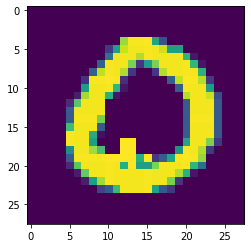

In [119]:
plt.imshow(tf.reshape(adversarials[0][sample], (28,28)))
print(np.argmax(model_to_attack(adversarials[0][sample])))
print('label = ',y_to_attack[sample].numpy())

0

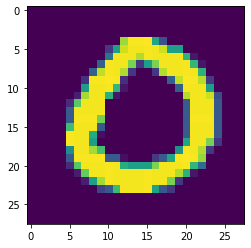

In [118]:
plt.imshow(tf.reshape(x_to_attack[sample], (28,28)))
np.argmax(model_to_attack(x_to_attack[sample]))

In [95]:
#lr 1e7
sum(dists)/1000

14.261

In [98]:
#lr 1e10
sum(dists)/1000

14.258

In [100]:
#lr 1e15
sum(dists)/1000

15.779

In [103]:
#lr 1e3 mit l0 dist datasetattack
sum(dists)/1000

18.635

In [105]:
#lr 1e3
sum(dists)/1000

16.218

In [103]:
#lr 1e7 mit l0 dist datasetattack
sum(dists)/1000

18.635

In [107]:
#lr 1e7 mit l2 dist datasetattack
sum(dists)/1000

15.352

In [110]:
#lr 1e7 mit 5000 steps 50 binary steps
sum(dists)/1000

15.402

In [112]:
#lr 1e5 mit 5000 steps 50 binary steps
sum(dists)/1000

15.19

In [114]:
#lr 1e3 mit 5000 steps 50 binary steps
sum(dists)/1000

14.014

In [121]:
#lr 1e3 mit 5000 steps 10 binary steps
sum(dists)/1000

15.332

In [123]:
#lr num decay=5, lr 1e3 mit 5000 steps 10 binary steps
sum(dists)/1000

16.215

In [125]:
#lr num decay=40, lr 1e3 mit 5000 steps 10 binary steps
sum(dists)/1000

11.85

In [127]:
#lr num decay=40, lr 1e7 mit 5000 steps 10 binary steps
sum(dists)/1000

13.066

In [12]:
#lr num decay=30, lr 1e3 mit 1000 steps 10 binary steps
sum(dists)/1000

9.63

In [14]:
#lr num decay=30, lr 1e2 mit 1000 steps 10 binary steps
sum(dists)/1000

10.005

In [16]:
#lr num decay=20, lr 1e4 mit 1000 steps 10 binary steps
sum(dists)/1000

8.635

In [18]:
#lr num decay=20, lr 1e4 mit 1000 steps 10 binary steps
sum(dists)/1000

8.667

In [20]:
#lr num decay=20, lr 1e4 mit 1000 steps 20 binary steps
sum(dists)/1000

8.0

In [22]:
#lr num decay=20, lr 1e5 mit 2000 steps 10 binary steps
sum(dists)/1000

8.125

In [24]:
#lr num decay=20, lr 1e5 mit 500 steps 30 binary steps
sum(dists)/1000

8.041

In [27]:
#lr num decay=20, lr 1e6 mit 500 steps 30 binary steps
sum(dists)/1000

7.655

In [29]:
#lr num decay=20, lr 1e7 mit 500 steps 30 binary steps
sum(dists)/1000

7.211

In [44]:
#lr num decay=40, lr 1e6 mit 500 steps 30 binary steps
sum(dists)/1000

8.208

In [31]:
#lr num decay=20, lr 1e7 mit 500 steps 40 binary steps
sum(dists)/1000

12.12

In [45]:
success

<tf.Tensor: shape=(1, 1000), dtype=bool, numpy=
array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, 